# Prediction of CLV and an analysis of factors that affect it
In this python project we have used data from the IBM Watson Marketing Customer Value Dataset which is a dataset focused on the car insurance data gathered from customers Across 5 different states in the United States. 

This project is meant to analyse the effects that different factors have on the CLV value generated by car insurance and how as a product manager I could effeciently help a company chose the correct target group to maximize their CLVs.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#machine learning 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import seaborn as sb
#preprocessing library 
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.dropna()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
#data cleaning for predictions
cols=['Customer','Customer Lifetime Value','Income', 'Total Claim Amount','Monthly Premium Auto']
df_final=df[cols]
df_final=df_final[df_final['Income']!=0] #removing any null values for income 
df_final.rename(columns={'Customer Lifetime Value':'CLV'}, inplace=True)
df_final.dropna()

,Customer,CLV,Income,Total Claim Amount,Monthly Premium Auto
0,BU79786,2763.519279,56274,384.811147,69
2,AI49188,12887.431650,48767,566.472247,108
4,HB64268,2813.692575,43836,138.130879,73
5,OC83172,8256.297800,62902,159.383042,69
6,XZ87318,5380.898636,55350,321.600000,67
...,...,...,...,...,...
9127,TF56202,5032.165498,66367,307.200000,64
9128,YM19146,4100.398533,47761,541.282007,104
9129,LA72316,23405.987980,71941,198.234764,73
9130,PK87824,3096.511217,21604,379.200000,79


In [ ]:
df_correlation=df.corr()
df_correlation.iloc[[0]]
df_correlation.iloc[[0]].to_csv("Correlation Table.csv")

<ipython-input-7-caf8ed9ef333>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation=df.corr()


From the results we can infer that Income has very little effect on the Customer Lifetime Vlaue for Car insurance which is interesting. We notice that the biggest contributors to the CLV are the Monthly Premium and the Total Claim Amount.

# Visualizing Data
Here we take 300 random samples from the dataset to obtain less noisy graph. We notice that there are a significant numbers of outliers which could drastically affect our prediction of CLV using linear regression. Therefore, if tarnsforming the data doesn't give us good results alternative forms of regression must be used to counteract the effects that these outliers have on the predictions of CLV. 

Text(0, 0.5, 'CLV')

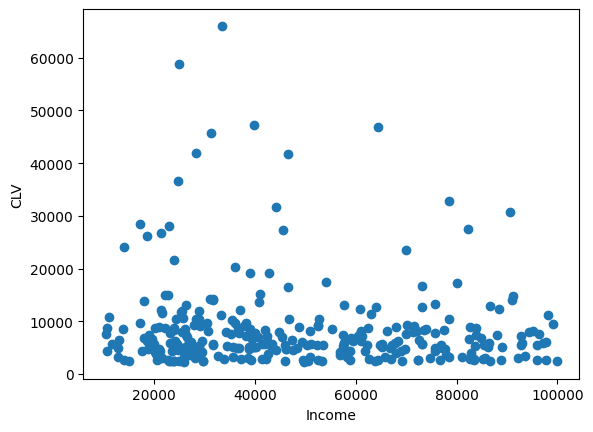

In [ ]:
#plotting the data we have
df_temp = df_final.sample(300) #selecting 500 random samples to plot 
CLV=np.array(df_temp['CLV'])
Income=np.array(df_temp['Income'])
Claim_amount=np.array(df_temp['Total Claim Amount'])

plt.scatter(Income, CLV)
plt.xlabel('Income')
plt.ylabel('CLV')


Text(0, 0.5, 'Number of Values')

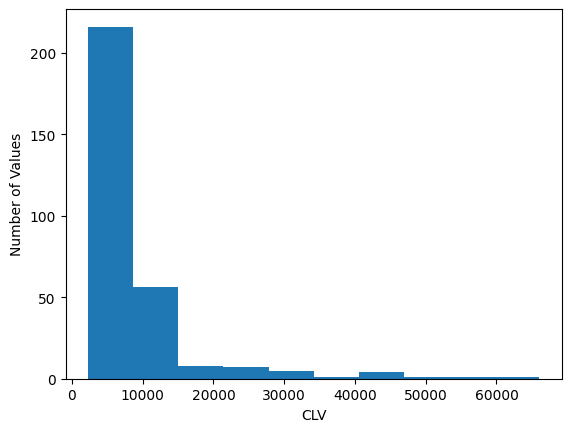

In [ ]:
plt.hist(df_temp["CLV"])
plt.xlabel("CLV")
plt.ylabel("Number of Values")

We can clearly see that the CLV data has some positive skewing which could affect our predictions. This problem can be solved by using a transform to evenly distribute the data. 

Text(0, 0.5, 'Number of Values')

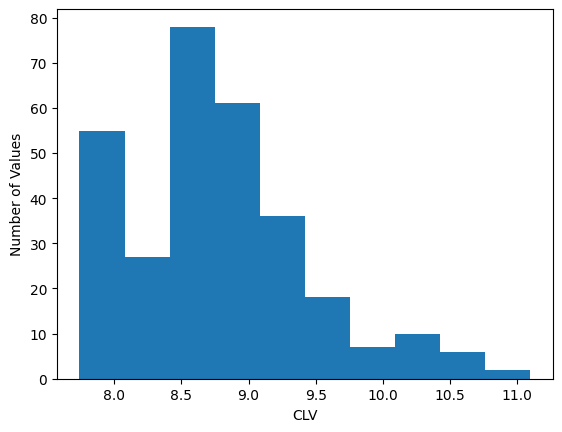

In [ ]:
plt.hist(np.log(df_temp["CLV"]))
plt.xlabel("CLV")
plt.ylabel("Number of Values")

(array([ 463., 1187.,  878.,  747.,  652.,  753.,  638.,  583.,  481.,
         435.]),
 array([10037. , 19031.4, 28025.8, 37020.2, 46014.6, 55009. , 64003.4,
        72997.8, 81992.2, 90986.6, 99981. ]),
 <BarContainer object of 10 artists>)

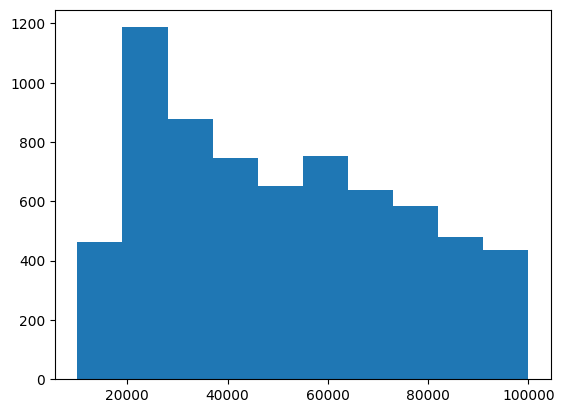

In [ ]:
plt.hist(df_final["Income"])

The Income is more evenly distirbuted. This doesn't require any further cleaning but the skewing the CLV graph compared to the income graph is a clear indication of their weak correlation one another. We can see tha, when it comes to car insurance income isn't a good predictor of possible CLV generated by a customer. 

In [ ]:
X1=np.array(df_temp["Income"]).reshape(-1,1)
Y1=np.array(np.log(df_temp["CLV"])).reshape(-1,1)
model=LinearRegression().fit(X1,Y1)
c1=model.intercept_
m1=model.coef_
print("m=",m1)
print("c=",c1)

m= [[-2.1803698e-06]]
c= [8.89410029]


In [ ]:
y_pred1=model.predict(X1)

Text(0, 0.5, 'CLV')

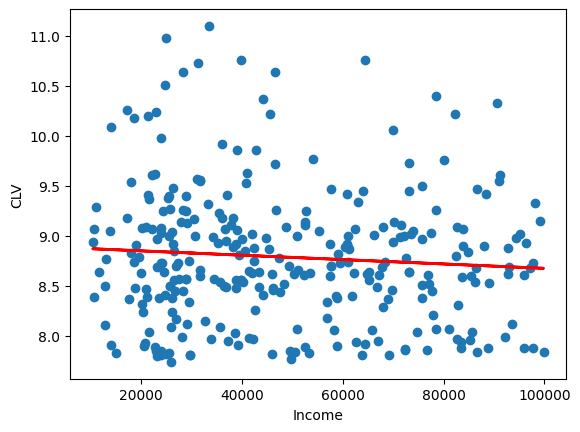

In [ ]:
plt.scatter(X1, Y1)
plt.plot(X1,y_pred1, 'r', linestyle='solid',linewidth=2)
plt.xlabel('Income')
plt.ylabel('CLV')

After using a log transform on the data we notice that the data is less skewed. This allows us to have a more accurate prediction compared to the un-transformed dataset that we had used. 

In [ ]:
#finding regression parameters
X2=np.array(df_temp["Income"]).reshape(-1,1)
Y2=np.array(np.log(df_temp["CLV"])).reshape(-1,1)
model=LinearRegression().fit(X2,Y2)
c1=model.intercept_
m1=model.coef_
print("m=",m1)
print("c=",c1)

m= [[-2.1803698e-06]]
c= [8.89410029]


Text(0, 0.5, 'CLV')

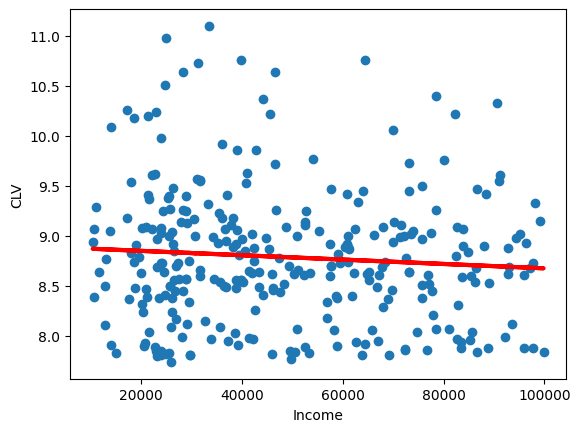

In [ ]:
y_pred2=model.predict(X2)
plt.scatter(X2, Y2)
plt.plot(X2,y_pred2, 'r', linestyle='solid',linewidth=3,)
plt.xlabel('Income')
plt.ylabel('CLV')

In [ ]:
X3=np.array(np.sqrt(df_temp["Total Claim Amount"])).reshape(-1,1)
Y3=np.array(np.log(df_temp["CLV"])).reshape(-1,1)
model=LinearRegression().fit(X3,Y3)
c1=model.intercept_
m1=model.coef_
print("m=",m1)
print("c=",c1)

m= [[0.02486131]]
c= [8.3297398]


Text(0, 0.5, 'CLV')

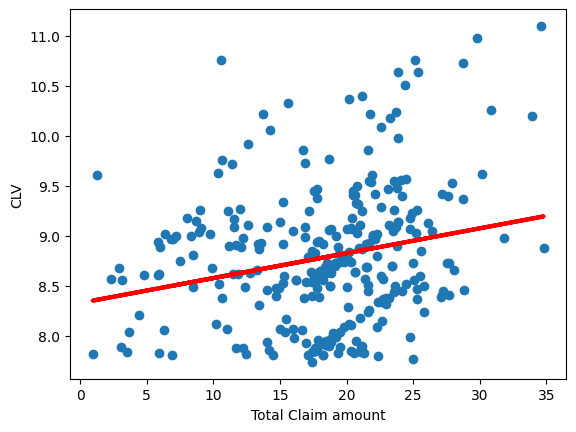

In [ ]:
y_pred3=model.predict(X3)
plt.scatter(X3, Y3)
plt.plot(X3,y_pred3, 'r', linestyle='solid',linewidth=3,)
plt.xlabel('Total Claim amount')
plt.ylabel('CLV')

Judging by the slope of both the lines we can see that there is a stronger correlation betwee the CLV and Toal Claim Amount than there is between CLV and Income. 

# Finding Optimal kmeans clusters
In this section we try to find the optimal clusters needed to effectively divide our Target customers(by CLV) into groups using kmeans. 

To do this we create an eblow plot of the inertia of the kmeans algorith vs the total number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

([<matplotlib.axis.XTick at 0x7f2db3d0c400>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

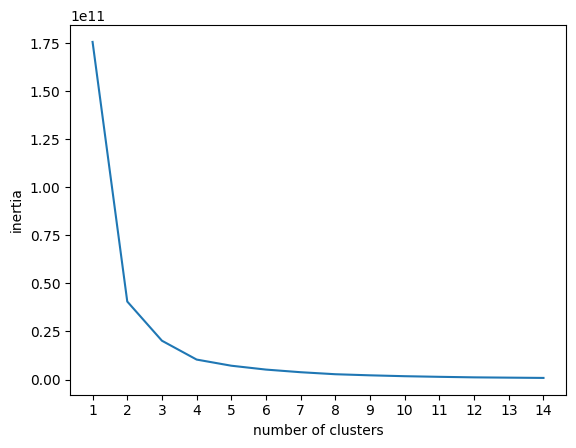

In [ ]:
inertia=[]
num_clusters=[]

for i in range(1,15):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(X2,Y3)
  num_clusters.append(i)
  inertia.append(kmeans.inertia_)

plt.plot(num_clusters,inertia)  
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.xticks(num_clusters)

Using this plot we can figure out that it is optimal to divide our custoemr base into 6 distinct groups for further analysis

In [ ]:
#normalizing the data of 300 samples that we have taken
scaler =StandardScaler()
df_normal=scaler.fit_transform(df_final[["CLV","Income","Monthly Premium Auto","Total Claim Amount"]])
df_normal=pd.DataFrame(df_normal,columns=[["Customer Lifetime Value","Income","Monthly Premium Auto","Total Claim Amount"]])
df_normal

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
0,-0.772349,0.239359,-0.692321,0.027591
1,0.684632,-0.069518,0.434436,0.746670
2,-0.765128,-0.272405,-0.576756,-0.948856
3,0.018143,0.512069,-0.692321,-0.864733
4,-0.395669,0.201341,-0.750103,-0.222621
...,...,...,...,...
6812,-0.445857,0.654637,-0.836777,-0.279621
6813,-0.579952,-0.110910,0.318871,0.646958
6814,2.198407,0.883981,-0.576756,-0.710944
6815,-0.724426,-1.187145,-0.403409,0.005380


In [ ]:
kmeans_income = KMeans(n_clusters=6, random_state=0, n_init="auto")
kmeans_income.fit(df_normal[["Customer Lifetime Value","Income"]])
#predict the labels of clusters.
label_income = kmeans_income.labels_

#kmeans.fit_predict(Y3)

# Kmeans for income

Text(0.5, 0, 'Income')

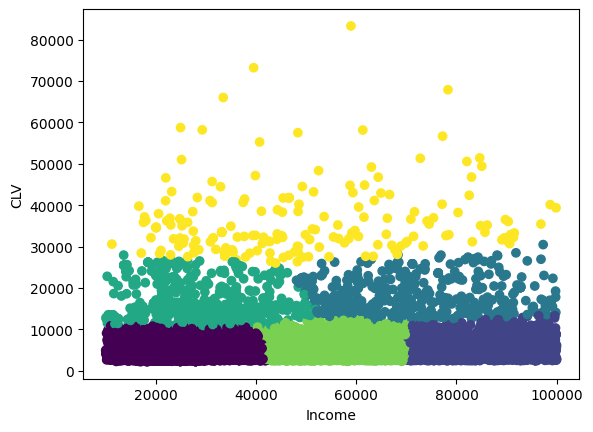

In [ ]:

plt.scatter(df_final["Income"],df_final["CLV"] , c=label_income)
plt.ylabel("CLV")
plt.xlabel("Income")

ON this clustering graph we can see that there is no clear distinction between different income groups when associated with CLV. This is coherent with what was previously shown in the correlation table

# Kmeans for Total Claim Amount

In [ ]:
kmeans_TCA = KMeans(n_clusters=6, random_state=0, n_init="auto")
kmeans_TCA.fit(df_normal[["Customer Lifetime Value","Total Claim Amount"]])
#predict the labels of clusters.
label_TCA = kmeans_TCA.labels_

#kmeans.fit_predict(Y3)
label_TCA_legend=set(label_TCA)

<ipython-input-24-d2813025fa61>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=label, alpha=0.7)


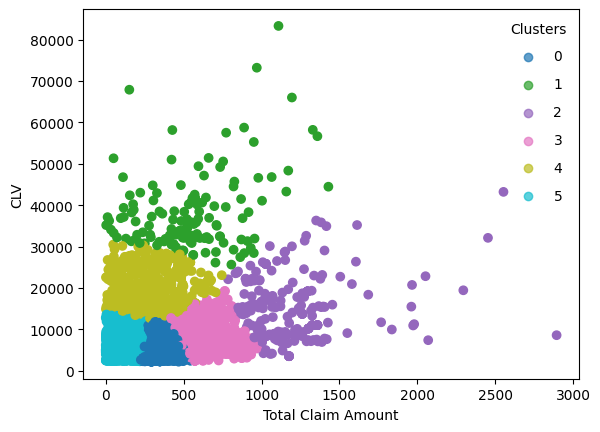

Cluster labels: [0 3 5 ... 4 0 3]
Colors: [[0.12156863 0.46666667 0.70588235 1.        ]
 [0.17254902 0.62745098 0.17254902 1.        ]
 [0.58039216 0.40392157 0.74117647 1.        ]
 [0.89019608 0.46666667 0.76078431 1.        ]
 [0.7372549  0.74117647 0.13333333 1.        ]
 [0.09019608 0.74509804 0.81176471 1.        ]]


In [ ]:
plt.scatter(df_final["Total Claim Amount"],df_final["CLV"] , c=label_TCA,cmap="tab10")
plt.ylabel("CLV")
plt.xlabel("Total Claim Amount")


unique_labels = np.unique(label_TCA)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
for i, (label, color) in enumerate(zip(unique_labels, colors)):
    plt.scatter([], [], c=color, label=label, alpha=0.7)

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Clusters')
plt.show()

# Print out labels and corresponding colors
print("Cluster labels:", label_TCA)
print("Colors:", colors)

From this graph we can infer some interesting conclusions regardin the data. There are 6 clear groups that are visible in this graph. The higher claims amounts do no necessarily gurantee a higher CLV of the customer. We can see from the plot that cluster group Dark Green gives a higher CLV value compared to cluster group Purple. 

So while Claim amount is strongly correlated to CLV it is not a direct relation to one another. 

# Monthly Premium amount 

(array([112.,  54.,  42.,  49.,  21.,   7.,   3.,   7.,   4.,   1.]),
 array([ 7.81024968,  8.57841805,  9.34658642, 10.11475479, 10.88292316,
        11.65109153, 12.4192599 , 13.18742827, 13.95559664, 14.72376501,
        15.49193338]),
 <BarContainer object of 10 artists>)

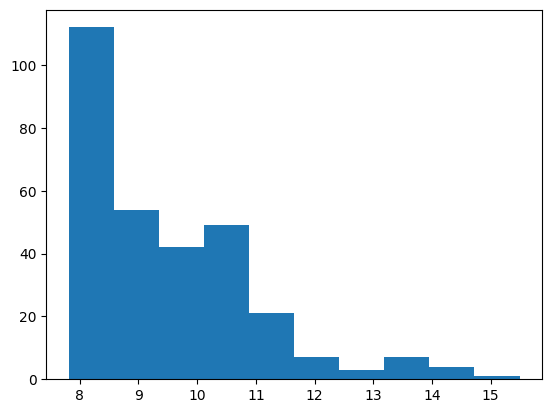

In [ ]:
plt.hist(np.sqrt(df_temp["Monthly Premium Auto"]))

In [ ]:
X4=np.array(np.log(df_temp["Monthly Premium Auto"])).reshape(-1,1)
Y4=np.array(np.log(df_temp["CLV"])).reshape(-1,1)
model=LinearRegression().fit(X3,Y3)
c1=model.intercept_
m1=model.coef_
print("m=",m1)
print("c=",c1)

m= [[0.02486131]]
c= [8.3297398]


Text(0, 0.5, 'CLV')

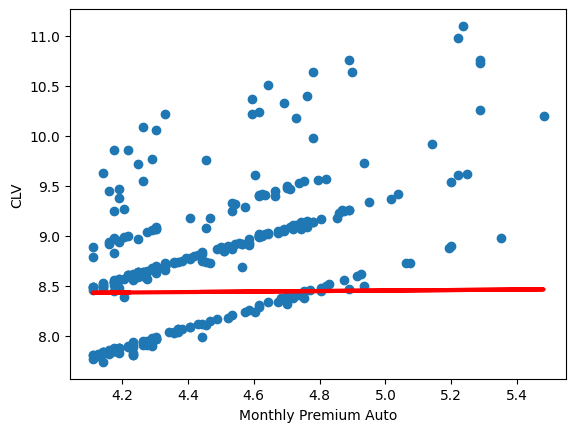

In [ ]:
y_pred4=model.predict(X4)
plt.scatter(X4,Y4)
plt.plot(X4,y_pred4, 'r', linestyle='solid',linewidth=3,)
plt.xlabel('Monthly Premium Auto')
plt.ylabel('CLV')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

([<matplotlib.axis.XTick at 0x7f2db0199a20>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

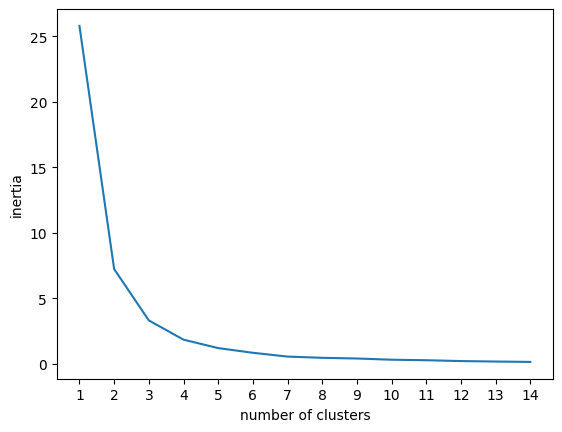

In [ ]:
inertia=[]
num_clusters=[]

for i in range(1,15):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(X4,Y4)
  num_clusters.append(i)
  inertia.append(kmeans.inertia_)

plt.plot(num_clusters,inertia)  
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.xticks(num_clusters)

In [ ]:
kmeans_MPA = KMeans(n_clusters=6, random_state=0, n_init="auto")
kmeans_MPA.fit(df_normal[["Customer Lifetime Value","Total Claim Amount"]])
#predict the labels of clusters.
label_MPA = kmeans_MPA.labels_

label_MPA_legend=set(label_MPA)

<ipython-input-30-dd7df9b8864e>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=label, alpha=0.7)


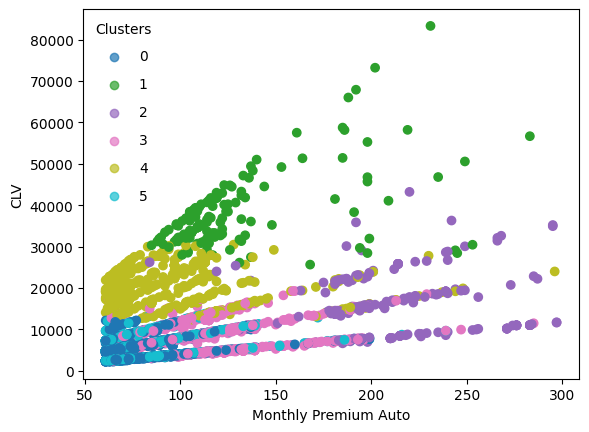

Cluster labels: [0 3 5 ... 4 0 3]
Colors: [[0.12156863 0.46666667 0.70588235 1.        ]
 [0.17254902 0.62745098 0.17254902 1.        ]
 [0.58039216 0.40392157 0.74117647 1.        ]
 [0.89019608 0.46666667 0.76078431 1.        ]
 [0.7372549  0.74117647 0.13333333 1.        ]
 [0.09019608 0.74509804 0.81176471 1.        ]]


In [ ]:
plt.scatter(df_final["Monthly Premium Auto"],df_final["CLV"] , c=label_TCA,cmap="tab10")
plt.ylabel("CLV")
plt.xlabel("Monthly Premium Auto")


unique_labels = np.unique(label_TCA)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
for i, (label, color) in enumerate(zip(unique_labels, colors)):
    plt.scatter([], [], c=color, label=label, alpha=0.7)

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Clusters')
plt.show()

# Print out labels and corresponding colors
print("Cluster labels:", label_TCA)
print("Colors:", colors)

We observe that labels Dark Green and Yellow give the best result for CLV. We reach a similar conclusion upon observing both, Total Claim Amount and Monthly Premium Auto. It seems that the customer lifetime value is more likely to decrease after a point where both monthly premium and Calim amount exceed a given value. Let us find the CLV values for which both a labelled as 1. This will give us the ideal target customers meant for buying car insurance. 

In [ ]:
df_final.insert(5, "Labels_TCA", label_TCA, True)
df_final.insert(6, "Labels_MPA", label_MPA, True)
  

In [ ]:
df_final

,Customer,CLV,Income,Total Claim Amount,Monthly Premium Auto,Labels_TCA,Labels_MPA
0,BU79786,2763.519279,56274,384.811147,69,0,0
2,AI49188,12887.431650,48767,566.472247,108,3,3
4,HB64268,2813.692575,43836,138.130879,73,5,5
5,OC83172,8256.297800,62902,159.383042,69,5,5
6,XZ87318,5380.898636,55350,321.600000,67,0,0
...,...,...,...,...,...,...,...
9127,TF56202,5032.165498,66367,307.200000,64,0,0
9128,YM19146,4100.398533,47761,541.282007,104,3,3
9129,LA72316,23405.987980,71941,198.234764,73,4,4
9130,PK87824,3096.511217,21604,379.200000,79,0,0


In [ ]:
targeted_market = df_final[df_final['Labels_TCA'] ==df_final['Labels_MPA']]

In [ ]:
targeted_market = df_final[df_final['Labels_TCA'] ==1]

In [ ]:
targeted_market.drop(['Labels_TCA', 'Labels_MPA'], axis=1).head()

,Customer,CLV,Income,Total Claim Amount,Monthly Premium Auto
50,WE95729,36707.42639,24804,593.830288,104
51,PY51963,33473.34946,33190,508.800000,106
79,OM82309,58166.55351,61321,427.631210,186
125,FH85960,31221.74810,42780,542.400000,113
232,KO26461,32269.85139,41520,289.904105,90


In [ ]:
#Finding number of valid customers 
targeted_market.shape

(154, 7)

Juding from this we can see that our targeted customerbase consistst of 154 customers out of 6817. Indicating that 2.25% of the customer base is giving the best possible CLV values for Car insurance 